In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from IPython.display import display

X.shape: (26, 2)


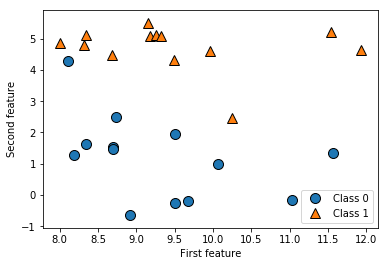

In [3]:
# データセットの生成
X, y = mglearn.datasets.make_forge()
#データをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

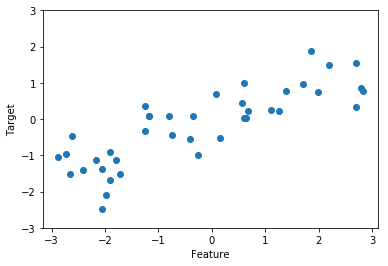

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

### ウィスコンシン乳がんデータ

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [8]:
cancer.data.shape

(569, 30)

In [9]:
print("Sample counts per class: \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [10]:
print("Feature names: \n{}".format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### ボストン住宅価格データセット

In [37]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


### 特徴量エンジニアリング

- 特徴量間の積（交互作用（interaction））も特徴量として扱う

In [38]:
# 特徴量エンジニアリングを行い、導出されたデータをimport
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### k-最近傍法

- 最も単純なアルゴリズムと言われる
- 訓練データセットの中から一番近い点「最近傍点」を見つけることで、予測を行う
- 複数の近傍点を考慮する場合、投票でラベルを決める（多数決）

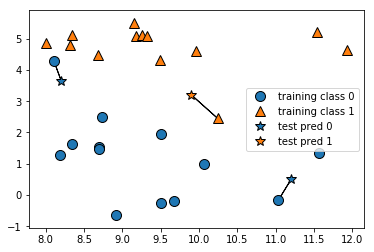

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

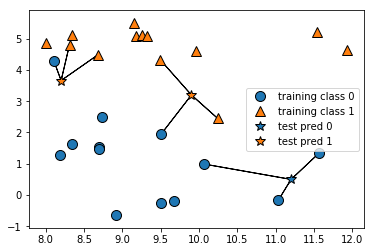

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [17]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [19]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [21]:
print("Test set accuracy: {}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.8571428571428571


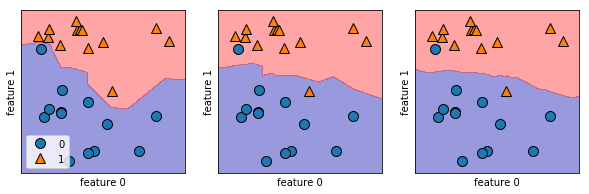

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    #　fitメソッドは自分自身を返すので、1行で
    # インスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

### モデルの複雑さと汎化性能の関係

In [27]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# n_neighborsを1から10まで試す
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #モデル構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    #汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

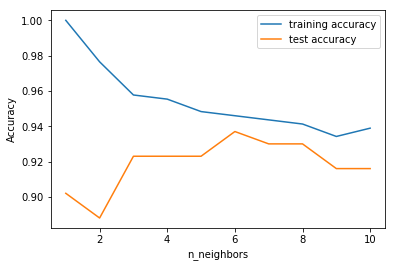

In [28]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### k-近傍回帰

- k-近傍法には、回帰を行う変種がある
- クラス分類の場合と同様に、より多くの最近傍点を用いることができ、その場合は最近傍点の平均値を用いる
- scikit-learnのKNeighborsRegressorクラスに実装されている

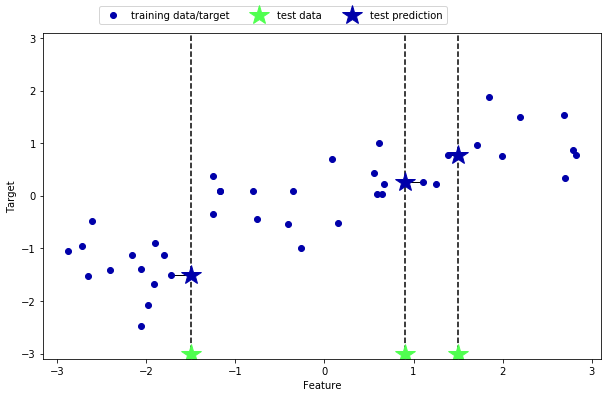

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

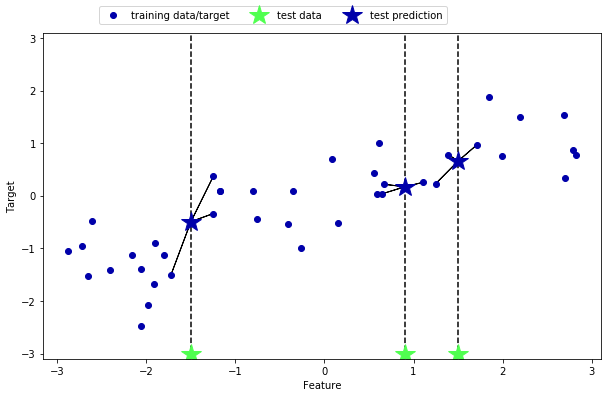

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [32]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

#waveデータセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近傍点を考慮するように設定して、モデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
#訓練データと訓練ターゲットをもいいてモデルを学習させる
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [33]:
print("Test set predictions: {}".format(reg.predict(X_test)))

Test set predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [34]:
#scoreメソッドを使い、モデルを評価する。決定係数（coefficient of determination）のR**2が使われる
print("Test set R^2: {}".format(reg.score(X_test, y_test)))

Test set R^2: 0.8344172446249604


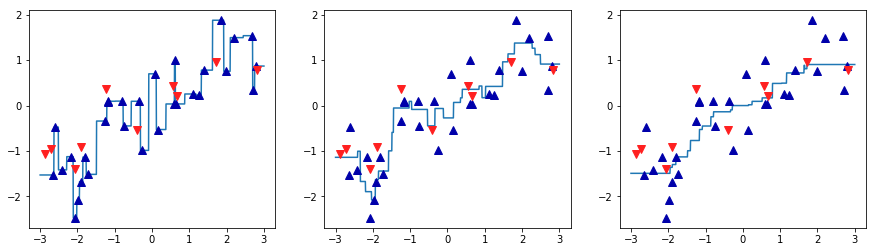

In [36]:
# 1次元のデータセットに対して、全ての値に対する予測ちがどのようになるのか見てみる
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3から3までの間に1000点のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    #1, 3, 9近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

- １最近傍点に夜回帰では、訓練セットのここの点が明らかに予測に影響を与えている（予測は全ての訓練データポイントを通っている）。予測は不安定
- 最近傍点を増やすと、予測はスムーズになるが、訓練データに対する適合度は下がっていく

### k-最近傍法の利点と欠点とパラメータ

- KNeighbors分類器には重要なパラメータが2つある
    - 近傍点の数（調整の必要あり）
    - データポイント間の距離測度（ほとんどの場合はデフォルトのユークリッド距離でうまくいく）
- k-最近傍法の利点
    - 理解しやすい
    - あまり調整しなくても高い精度が出る
- k-最近傍法の欠点
    - データが大きくなると、処理速度が遅くなる
    - 多数の特徴量（数百以上）をもつデータセットではうまくいかない。前処理が必要
    - 疎なデータセット（ほとんどの特徴量が多くの場合0になるようなデータセット）ではうまく機能しない